<a href="https://colab.research.google.com/github/pichaicpc/colab/blob/main/AI_week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **การเขียนโปรแกรม Smart Speaker และ IoT อื่น ๆ**

**เอกสาร IoT**

https://drive.google.com/file/d/1JqPsFvdC0EGAYJNmkiBJKfBO9HhZemZl/view?usp=sharing

### **1. การเขียนโปรแกรมควบคุม Smart Speaker**

In [ ]:
#------------------------------------------------------------------------------
#Step 1. ติดตั้ง Python และ vertual environment
#------------------------------------------------------------------------------
#ติดตั้ง Python
#1. สำหรับการติดตั้งบน windows
#   ดาวน์โหลดไฟล์ได้จาก https://www.python.org/
#   ทำการติดตั้งจากไฟล์ที่ดาวน์โหลดมา
#   ตรวจสอบเวอร์ชันด้วยคำสั่ง c:\ python --version
#2. สำหรับการติดตั้งบน raspberry pi/linux (Optional)
#   $ sudo apt install python3 idle3
#   ตรวจสอบเวอร์ชันด้วยคำสั่ง c:\ python --version

#ติดตั้ง vertual environment (optional)
#1. สำหรับการติดตั้งบน windows
#   c:\ python -m venv myenv #สำหรับสร้าง virtual env.
#   c:\ myenv\Scripts\activate #สำหรับ activate virtual env.
#2. สำหรับการติดตั้งบน raspberry pi/linux
#   $ python -m venv myenv #สำหรับสร้าง virtual env.
#   $ source myenv/bin/activate #สำหรับ activate virtual env.

In [ ]:
#------------------------------------------------------------------------------
#Step 2. ติดตั้ง python library ดังนี้
#------------------------------------------------------------------------------
# pip install SpeechRecognition   #Speech to Text
# pip install google-generativeai #Text to Text
# pip install gTTS                #Text to Speech
# pip install pyaudio             #ใช้สำหรับการบันทึกเสียง
# pip install pygame              #ใช้สำหรับให้เสียง

# หมายเหตู :
# pip install setuptools #แก้ปัญหา No module 'distutils' ใน SpeechRecognition
# sudo apt install portaudio19-dev #แก้ปัญหา portaudio.h: No such file ใน pyaudio
# set PYGAME_HIDE_SUPPORT_PROMPT=1 #ignore wanning from pygame (on Windows)
# export PYGAME_HIDE_SUPPORT_PROMPT=1 #ignore wanning from pygame (On Linux)

In [ ]:
#------------------------------------------------------------------------------
#Step 3. ขอ Gemini API key
#------------------------------------------------------------------------------
#โดยเข้าไปขอได้จาก https://ai.google.dev/gemini-api/docs/api-key

In [ ]:
#------------------------------------------------------------------------------
#Step 4. ทดสอบการใช้งาน Speech to Text (English version)
#------------------------------------------------------------------------------
import speech_recognition as sr

# Main loop for interactive voice input
while True:
    r = sr.Recognizer()

    # Listen speech from microphone
    with sr.Microphone() as source:
        print("Speak now to Gemini...")
        audio = r.listen(source)

    # Change speech to text
    try:
        text = r.recognize_google(audio, language='en')
        print("You said:", text)

       # Exit loop if the user says "stop"
        if "stop" in text.lower():
            print("Stopping the loop...")
            break

    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from speech recognition service; {e}")

#สร้างเป็นไฟล์ชื่อ text_speech.py แล้ว run ด้วยคำสั่ง
#python text_speech.py

#กรณีต้องการปิด warning ของ ALSA ใน raspberry pi ให้ run ด้วยคำสั่ง
#python text_speech.py 2> /dev/null

In [ ]:
#------------------------------------------------------------------------------
#Step 5. ทดสอบการใช้งาน Speech to Text (Thai version)
#------------------------------------------------------------------------------
import speech_recognition as sr

# Main loop for interactive voice input
while True:
    r = sr.Recognizer()

    # Listen speech from microphone
    with sr.Microphone() as source:
        print("Speak now to Gemini...")
        audio = r.listen(source)

    # Change speech to text
    try:
        text = r.recognize_google(audio, language='th')
        print("You said:", text)

       # Exit loop if the user says "stop"
        if "หยุด" in text.lower():
            print("Stopping the loop...")
            break

    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from speech recognition service; {e}")


In [ ]:
#------------------------------------------------------------------------------
#Step 6. ทดสอบการใช้งาน Text to Text (Gemini)
#------------------------------------------------------------------------------
import google.generativeai as genai

# Retrieve API key from environment variable
GOOGLE_GEMINI_API_KEY = 'GOOGLE_GEMINI_API_KEY'

# Configure the Generative AI library
genai.configure(api_key=GOOGLE_GEMINI_API_KEY)

# Load the Gemini model
model = genai.GenerativeModel('gemini-1.5-flash')

# Prompt
text = 'ปัญญาประดิษฐ์คืออะไร'

# Response
response = model.generate_content(text)
print("Gemini:", response.text)

In [ ]:
#------------------------------------------------------------------------------
#Step 7. ทดสอบการใช้งาน Text to Speech (English version)
#------------------------------------------------------------------------------
from gtts import gTTS
import pygame
import os

filename = 'output.mp3' # Define file name
text = 'Hello, how are you?' # Get text

tts = gTTS(text=text, lang='en')
tts.save(filename) # Save the MP3 file

# Play MP3 file
pygame.mixer.init() # Initialize the mixer
pygame.mixer.music.load(filename)
pygame.mixer.music.play()
while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)
pygame.mixer.quit()

os.remove(filename) # Delete the file

In [ ]:
#------------------------------------------------------------------------------
#Step 8. ทดสอบการใช้งาน Text to Speech (Thai version)
#------------------------------------------------------------------------------
from gtts import gTTS
import pygame
import os

filename = 'output.mp3' # ตั้งชื่อไฟล์
text = 'สวัสดี, คุณเป็นไงบ้าง?' # คำพูด

tts = gTTS(text=text, lang='th')
tts.save(filename) # บันทึกไฟล์เสียง

# เล่นไฟล์เสียง
pygame.mixer.init() # Initialize the mixer
pygame.mixer.music.load(filename)
pygame.mixer.music.play()
while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)
pygame.mixer.quit()

os.remove(filename) # ลบไฟล์เสียง

In [ ]:
#------------------------------------------------------------------------------
#Step 9. Full Smart Speaker (English version)
#------------------------------------------------------------------------------
import speech_recognition as sr
import google.generativeai as genai
from gtts import gTTS
import pygame
import os

# API key
GOOGLE_GEMINI_API_KEY = 'YOUR_GOOGLE_GEMINI_API_KEY'

# Configure the API key
genai.configure(api_key=GOOGLE_GEMINI_API_KEY)

# Load the Gemini model
model = genai.GenerativeModel('gemini-1.5-flash')

# Define MP3 file name
filename = 'output.mp3'

# Main loop for interactive voice input and response
while True:
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak now to Gemini...")
        audio = r.listen(source)

    try:
        #Speech to text
        text = r.recognize_google(audio, language='en')
        print("You said:", text)

       # Exit loop if the user says "stop"
        if "stop" in text.lower():
            print("Stopping the loop...")
            break

        # Text to text
        response = model.generate_content(text)
        print("Gemini:", response.text)

        # Text to speech
        tts = gTTS(text=response.text, lang='en')
        tts.save(filename) # Save the MP3 file

        # Play MP3 file
        pygame.mixer.init() # Initialize the mixer
        pygame.mixer.music.load(filename)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():
            pygame.time.Clock().tick(10)
        pygame.mixer.quit()

        os.remove(filename) # Delete the file

    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from speech recognition service; {e}")

In [ ]:
#------------------------------------------------------------------------------
#Step 10. Full Smart Speaker (Thai version)
#------------------------------------------------------------------------------
import speech_recognition as sr
import google.generativeai as genai
from gtts import gTTS
import pygame
import os
import re

# API key
GOOGLE_GEMINI_API_KEY = 'YOUR_GOOGLE_GEMINI_API_KEY'

# Configure the API key
genai.configure(api_key=GOOGLE_GEMINI_API_KEY)

# Load the Gemini model
model = genai.GenerativeModel('gemini-1.5-flash')

# Define MP3 file name
filename = 'output.mp3'

# Main loop for interactive voice input and response
while True:
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak now to Gemini...")
        audio = r.listen(source)

    try:
        #Speech to text
        text = r.recognize_google(audio, language='th')
        print("You said:", text)

       # Exit loop if the user says "stop"
        if "หยุด" in text.lower():
            print("Stopping the loop...")
            break

        # Text to text
        response = model.generate_content(text)
        print("Gemini:", response.text)

        # Remove Markdown formatting
        clean_text = re.sub(r'[*_`~#]', '', response.text)

        # Text to speech
        tts = gTTS(text=clean_text, lang='th')
        tts.save(filename) # Save the MP3 file

        # Play MP3 file
        pygame.mixer.init() # Initialize the mixer
        pygame.mixer.music.load(filename)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():
            pygame.time.Clock().tick(10)
        pygame.mixer.quit()

        os.remove(filename) # Delete the file

    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from speech recognition service; {e}")

### **2. การเขียนโปรแกรมควบคุม เซ็นเซอร์วัดอุณหภูมิ/ความชื้น DHT22**

In [ ]:
# save to dht.py
import time
import board
import adafruit_dht

# Initial the dht device, with data pin connected to:
dhtDevice = adafruit_dht.DHT22(board.D2)


while True:
    try:
        # Print the values to the serial port
        temperature_c = dhtDevice.temperature
        temperature_f = temperature_c * (9 / 5) + 32
        humidity = dhtDevice.humidity
        print(
            "Temp: {:.1f} F / {:.1f} C    Humidity: {}% ".format(
                temperature_f, temperature_c, humidity
            )
        )

    except RuntimeError as error:
        # Errors happen fairly often, DHT's are hard to read, just keep going
        print(error.args[0])
        time.sleep(2.0)
        continue
    except Exception as error:
        dhtDevice.exit()
        raise error

    time.sleep(2.0)

### **3. การเขียนโปรแกรมควบคุม ไฟ LED**

In [ ]:
# save to led.py
import RPi.GPIO as GPIO
import time

# Use the Broadcom pin numbering scheme (BCM)
GPIO.setmode(GPIO.BCM)

# Set up GPIO Pin 4 as an output pin
LED_PIN = 4
GPIO.setup(LED_PIN, GPIO.OUT)

try:
    while True:
        # Turn the LED on
        GPIO.output(LED_PIN, GPIO.HIGH)
        print("LED is ON")
        time.sleep(1)  # Keep the LED on for 1 second

        # Turn the LED off
        GPIO.output(LED_PIN, GPIO.LOW)
        print("LED is OFF")
        time.sleep(1)  # Keep the LED off for 1 second

except KeyboardInterrupt:
    # If the user presses Ctrl+C, break out of the loop and clean up
    print("Program stopped by user")

finally:
    # Clean up the GPIO settings before exiting
    GPIO.cleanup()

### **4. การเขียนโปรแกรมรับส่งข้อมูลระหว่าง Raspberry Pi กับ Arduino**

In [ ]:
// Save to i2c
#include <Wire.h>

void setup() {
  Wire.begin(0x08); // กำหนดที่อยู่ I2C ของ Arduino
  Wire.onRequest(requestEvent); // ฟังก์ชันเมื่อมีการขอข้อมูลจาก Master
}

void requestEvent() {
  Wire.write("Hello Pi!"); // ข้อความที่ส่งไปยัง Raspberry Pi
}

void loop() {
  delay(1000);
}

In [ ]:
# save to i2c.py
from smbus2 import SMBus
import time

bus = SMBus(1)  # ใช้ bus 1 สำหรับ I2C
arduino_address = 0x08  # ที่อยู่ของ Arduino

while True:
    # อ่านข้อมูลจาก Arduino ขนาด 16 bytes จาก register address
    # หมายเลข 0 ซึ่งเป็นหมายเลขเริ่มต้น
    data = bus.read_i2c_block_data(arduino_address, 0, 16)

    # นำค่าแต่และ byte มาเชื่อมต่อกัน และกรองค่าที่เป็น 255 (ÿ) ออก
    # ค่า 255 เกิดจาก arduino ส่งค่ามาไม่ถึง 16 bytes
    data_str = ''.join(chr(i) for i in data if i != 255)
    print("Data from Arduino: ", data_str)  # แสดงข้อมูล
    time.sleep(1)

### **5. การเขียนโปรแกรมควบคุมระดับน้ำ โดยส่งค่าจาก Arduno ไปยัง Raspberry Pi**

In [ ]:
// save to water_level.ino
#include <Wire.h>

int analogPin = A0;  // ขาอะนาล็อกที่ต่อกับเซนเซอร์วัดระดับน้ำ
int val = 0;  // ตัวแปรเก็บค่าระดับน้ำที่อ่านได้

void setup() {
  Wire.begin(0x08);  // กำหนดที่อยู่ I2C ของ Arduino (0x08)
  Wire.onRequest(requestEvent);  // ฟังก์ชันเมื่อมีการขอข้อมูลจาก Raspberry Pi
}

void requestEvent() {
  val = analogRead(analogPin);  // อ่านค่าระดับน้ำจากเซนเซอร์ (0 - 1023)
  String water_level = String(val);  // แปลงค่าเป็นสตริง
  Wire.write(water_level.c_str());  // ส่งข้อมูลสตริงไปยัง Raspberry Pi
}

void loop() {
  delay(1000);  // หน่วงเวลาเพื่อรอคำขอจาก Raspberry Pi
}

In [ ]:
# save to water_level.py
from smbus2 import SMBus
import time

bus = SMBus(1)  # ใช้ bus 1 สำหรับ I2C
arduino_address = 0x08  # ที่อยู่ของ Arduino

while True:
    # อ่านข้อมูลจาก Arduino ขนาด 16 bytes จาก register address
    # หมายเลข 0 ซึ่งเป็นหมายเลขเริ่มต้น
    data = bus.read_i2c_block_data(arduino_address, 0, 16)

    # นำค่าแต่และ byte มาเชื่อมต่อกัน และกรองค่าที่เป็น 255 (ÿ) ออก
    # ค่า 255 เกิดจาก arduino ส่งค่ามาไม่ถึง 16 bytes
    data_str = ''.join(chr(i) for i in data if i != 255)
    print("Data from Arduino: ", data_str)  # แสดงข้อมูล
    time.sleep(1)

### **6. การเขียนโปรแกรมควบคุมระดับน้ำ (ส่งเสียงออกลำโพง)  โดยส่งค่าจาก Arduno ไปยัง Raspberry Pi**

In [ ]:
# save to water_speaker.py
from smbus2 import SMBus
import time
from gtts import gTTS
import pygame
import os

bus = SMBus(1)  # ใช้ bus 1 สำหรับ I2C
arduino_address = 0x08  # ที่อยู่ของ Arduino

while True:
    data = bus.read_i2c_block_data(arduino_address, 0, 16)
    data_str = ''.join(chr(i) for i in data if i != 255)
    print("Data from Arduino: ", data_str)  # แสดงข้อมูล
    try:
        # แปลงสตริงเป็น integer
        water_level = int(data_str)
        if water_level > 500:
            filename = 'output.mp3' # ตั้งชื่อไฟล์
            text = 'ระดับน้ำมากเกินไป' # คำพูด
            tts = gTTS(text=text, lang='th')
            tts.save(filename) # บันทึกไฟล์เสียง

            # เล่นไฟล์เสียง
            pygame.mixer.init() # Initialize the mixer
            pygame.mixer.music.load(filename)
            pygame.mixer.music.play()
            while pygame.mixer.music.get_busy():
                pygame.time.Clock().tick(10)
            pygame.mixer.quit()

            os.remove(filename) # ลบไฟล์เสียง
            time.sleep(60)

    except ValueError:
        # หากข้อมูลไม่สามารถแปลงเป็น integer ได้ (ไม่ใช่ตัวเลขล้วน)
        print("Invalid data received:", data_str)


    time.sleep(1)

### **7 การเขียนโปรแกรมรับส่งข้อมูลระหว่าง Raspberry Pi กับ ESP32**

In [ ]:
// save to i2c_esp32.ino
#include <Wire.h>

void setup() {
  Wire.begin(0x08); // กำหนดที่อยู่ I2C ของ ESP32
  Wire.onRequest(requestEvent); // ฟังก์ชันเมื่อมีการขอข้อมูลจาก Master
}

void requestEvent() {
  const char* message = "Hello Pi!";
  Wire.write((uint8_t*)message, strlen(message)); // ส่งข้อความที่แปลงเป็น uint8_t
}

void loop() {
  delay(1000);
}



### **8. การเขียนโปรแกรมวัดค่าระดับน้ำ โดยส่งค่าจาก ADS1115 ไปยัง Raspberry Pi**

In [ ]:
import time
import board
import busio
from adafruit_ads1x15.analog_in import AnalogIn
import adafruit_ads1x15.ads1015 as ADS

# ตั้งค่า I2C
i2c = busio.I2C(board.SCL, board.SDA)
ads = ADS.ADS1015(i2c)

# ตั้งค่า Channel สำหรับเซ็นเซอร์วัดระดับน้ำ (A0)
water_level = AnalogIn(ads, ADS.P0)

print("Reading water level...")
print("-" * 30)


# วนลูปอ่านค่า
while True:
    # อ่านค่าแรงดัน
    #value = water_level.value  # ค่า RAW จาก ADC
    voltage = water_level.voltage  # ค่าแรงดันไฟฟ้า

    # calibrate
    if voltage >= 3.45:
       level_percent = 100
    elif voltage >= 3.3:
       level_percent = 75
    elif voltage >= 3.25:
       level_percent = 50
    elif voltage >= 2.8:
       level_percent = 25
    elif voltage >= 2.5:
       level_percent = 12.5
    else:
       level_percent = 0

    print(f"Water Level: {level_percent:.1f}% Raw value: {voltage}")

    time.sleep(1)

### **8. การเขียนโปรแกรมรับส่งข้อมูลระหว่าง Raspberry Pi กับ Blynk**

In [ ]:
#------------------------------------------------------------------------------
#ขั้นตอนการติดตั้ง Blynk
#------------------------------------------------------------------------------
# 1. สร้าง tempate จาก https://blynk.cloud/

# 2. เพิ่ม device และ dashboard จาก https://blynk.cloud/ หรือจาก
#    https://apps.apple.com/th/app/blynk-iot/id1559317868?l=th
#    https://play.google.com/store/apps/details?id=cloud.blynk&hl=en

# 3. ติดตั้ง blynk library
# $ source myenv/bin/activate
# $ git clone https://github.com/vshymanskyy/blynk-library-python
# $ cd blynk-library-python
# $ pip install .

In [ ]:
# create and run blynk.py
import BlynkLib
import time
import random

blynk = BlynkLib.Blynk('YOUR_AUTHEN_TOKEN')


@blynk.on("V1")
def v1_write_handler(value):
    print('Current slider value: {}'.format(value[0]))

start_time = time.time()
while True:
    blynk.run()

    t = time.time()
    if t - start_time > 1:
        #print("1 sec elapsed, sending data to V0 on the server...")
        blynk.virtual_write(0, random.randint(0, 1023))
        start_time += 1

### **9. การเขียนโปรแกรมรับส่งข้อมูลระหว่าง Raspberry Pi กับ Netpie**

In [ ]:
#------------------------------------------------------------------------------
#ขั้นตอนการติดตั้ง Netpie
#------------------------------------------------------------------------------
# 1. สร้าง project จาก https://netpie.io/

# 2. เพิ่ม device และ dashboard จาก https://netpie.io/ หรือเพิ่ม dashboard จาก
#  https://play.google.com/store/apps/details?id=com.nexpie.piedash.netpie&hl=en
#  https://apps.apple.com/th/app/netpie/id6445916537

# 3. ติดตั้ง mqtt library
# $ source myenv/bin/activate
# $ pip install paho-mqtt

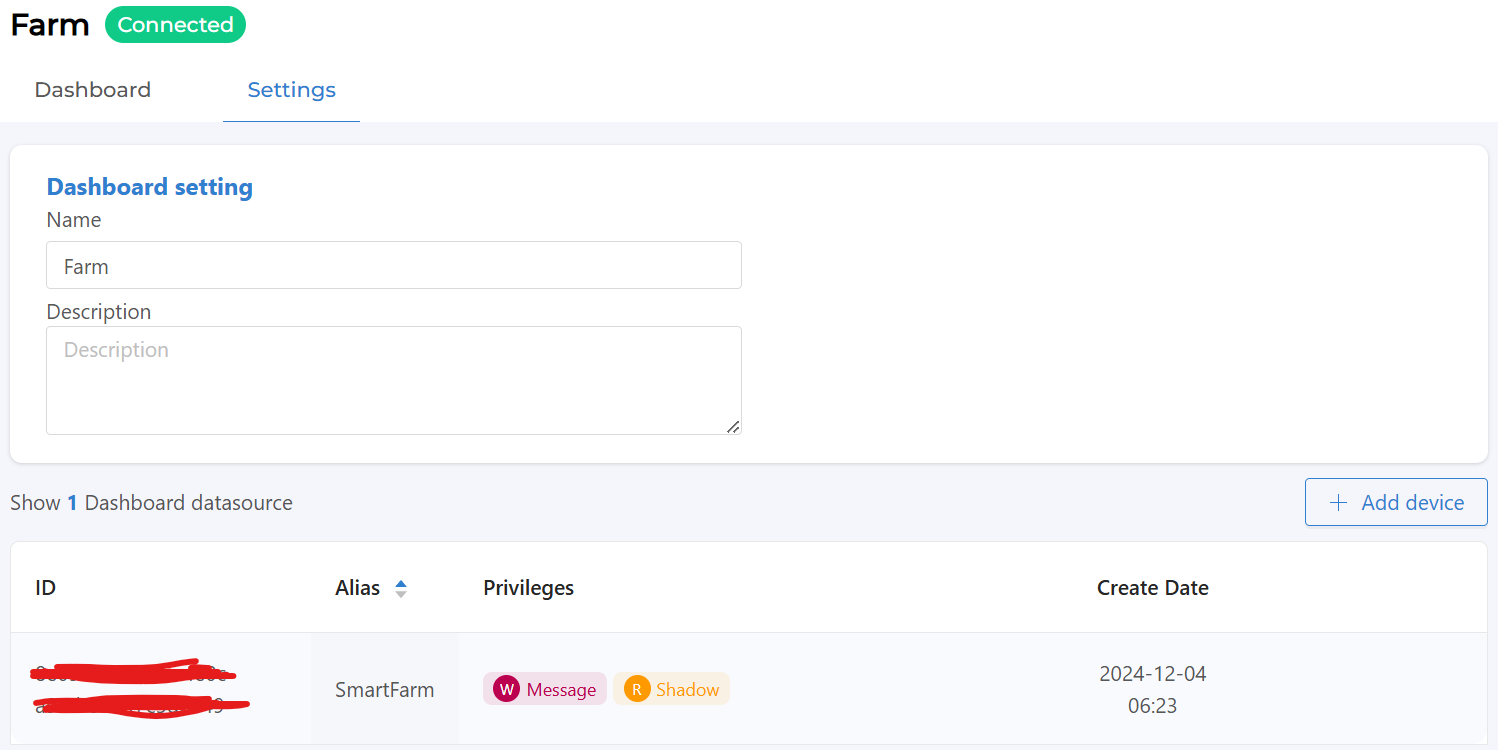

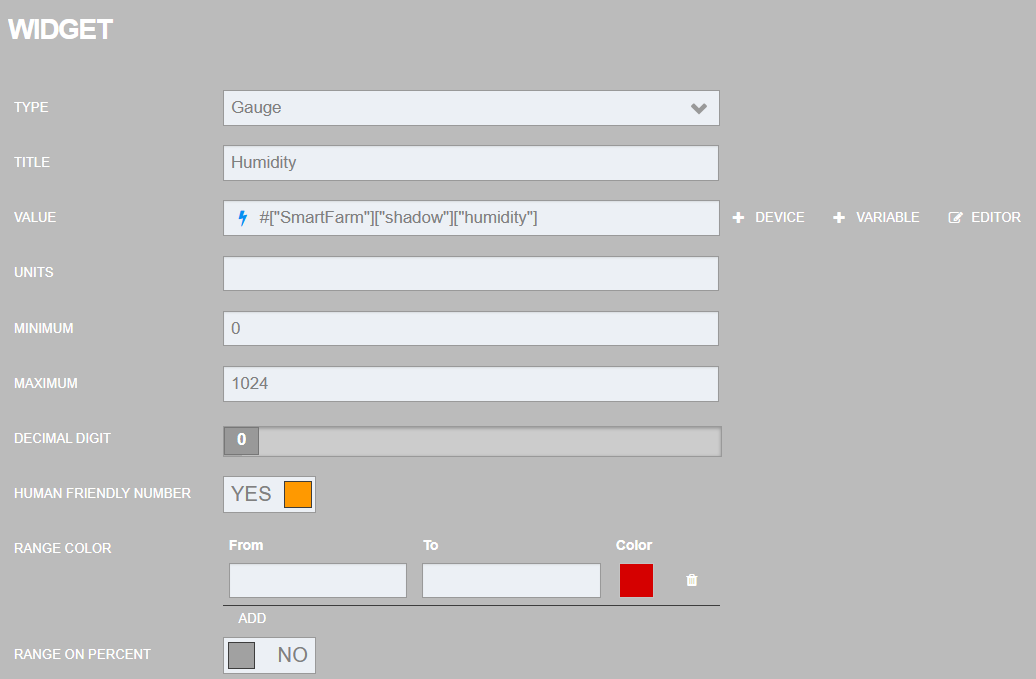

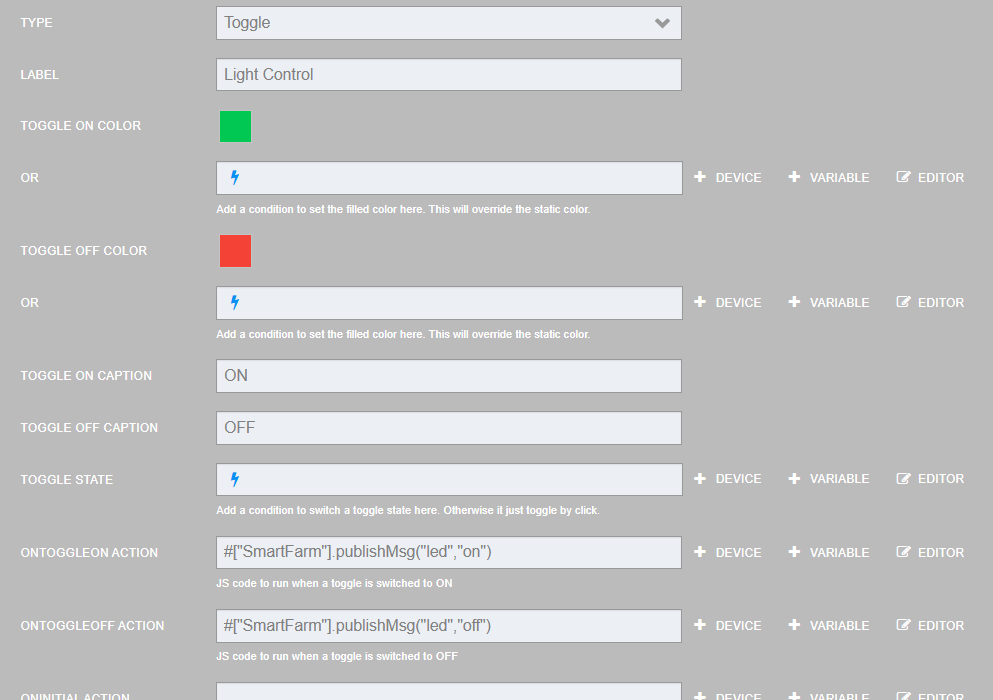

In [ ]:
import time
import paho.mqtt.client as mqtt
import json
import random


NETPIE_HOST = "broker.netpie.io"
CLIENT_ID = "YOUR_CLIENT_ID"
DEVICE_TOKEN = "YOUR_DEVICE_TOKEN"

sensor_data = {'temperature': 0, 'humidity': 0}

def on_connect(client, userdata, flags, rc):
    print("Result from connect: {}".format(
        mqtt.connack_string(rc)))
    #client.subscribe("@shadow/data/updated")
    client.subscribe("@msg/led")

def on_message(client, userdata, msg):
    light = msg.payload.decode('utf-8')
    print(light)
    if light == "on":
       print("Light is on")
    else:
       print("Light is off")

client = mqtt.Client(protocol=mqtt.MQTTv311,
                     client_id=CLIENT_ID, clean_session=True)
client.username_pw_set(DEVICE_TOKEN)
client.on_connect = on_connect
client.on_message = on_message
client.connect(NETPIE_HOST, 1883)
client.loop_start()

try:
    while True:
        humidity = random.randint(0, 1023)
        temperature = random.randint(0, 100)

        if humidity is not None and temperature is not None:
            print(f"Temperature: {temperature}\u00b0C, Humidity: {humidity}")
            sensor_data['temperature'] = temperature
            sensor_data['humidity'] = humidity

            client.publish('@shadow/data/update', json.dumps({"data": sensor_data}), 1)
            time.sleep(5)
        else:
            print('Failed to get reading. Try again!')
except KeyboardInterrupt:
    pass

client.loop_start()
client.disconnect()

### **10. การเขียนโปรแกรมแจ้งเตือน ด้วย Line Notification**

In [ ]:
#สำหรับส่งเฉพาะข้อความ
#https://notify-bot.line.me/en/
import requests

def send_line_notification(token, message):
    url = "https://notify-api.line.me/api/notify"
    headers = {
        "Authorization": f"Bearer {token}",
    }
    data = {
        "message": message
    }

    try:
        response = requests.post(url, headers=headers, data=data)
        response.raise_for_status()  # Raise an exception for HTTP errors
        print("Notification sent successfully!")
    except requests.exceptions.RequestException as e:
        print(f"Error sending notification: {e}")

# Example usage
line_token = "YOUR_LINE_NOTIFY_ACCESS_TOKEN"
message = "Hello! This is a test notification from Python."
send_line_notification(line_token, message)

In [ ]:
#สำหรับส่งทั้งข้อความและภาพ
import requests

def send_line_notification(token, message, image_path):
    url = "https://notify-api.line.me/api/notify"
    headers = {"Authorization": f"Bearer {token}"}
    data = {"message": message}
    files = {"imageFile": open(image_path, "rb")}

    try:
        response = requests.post(url, headers=headers, data=data, files=files)
        response.raise_for_status()  # Raise an exception for HTTP errors
        print("Notification sent successfully!")
    except requests.exceptions.RequestException as e:
        print(f"Error sending notification: {e}")

# Example usage
line_token = "YOUR_LINE_NOTIFY_ACCESS_TOKEN"
message = "Hello! This is a test notification from Python."
image_path = "image01.jpg"
send_line_notification(line_token, message, image_path)

### **11. การเขียนโปรแกรมตรวจจับผู้บุกรุกด้วย Webcam และ OpenCV แล้วแจ้งเตือนด้วย Line Notification**

In [ ]:
#ติดตั้ง OpenCV
#sudo apt update
#sudo apt install -y python3-dev python3-pip cmake build-essential libjpeg-dev libpng-dev libtiff-dev libavcodec-dev libavformat-dev libswscale-dev libv4l-dev libxvidcore-dev libx264-dev libgtk-3-dev libatlas-base-dev gfortran
pip install opencv-python


In [ ]:
import cv2
import time
import os
import requests

# Function to send an image to LINE Notify
def send_to_line(image_path, message, token):
    url = "https://notify-api.line.me/api/notify"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    payload = {"message": message}
    files = {"imageFile": open(image_path, "rb")}
    response = requests.post(url, headers=headers, data=payload, files=files)
    return response.status_code

# Initialize the video capture
video = cv2.VideoCapture(0)  # 0 for the default webcam

# Check if the video feed is available
if not video.isOpened():
    print("Error: Could not open video.")
    exit()

# Intruder detection settings
min_contour_area = 500  # Minimum size of motion to detect

# Initialize BackgroundSubtractorMOG2 for dynamic background
backSub = cv2.createBackgroundSubtractorMOG2()
intruder_detected = False
capture_delay = 2  # Delay in seconds to capture after motion detected
last_notification_time = 0  # Time of the last notification
notification_interval = 60  # Minimum interval in seconds between notifications

# Create a folder to save intruder images
output_dir = "intruder_images"
os.makedirs(output_dir, exist_ok=True)

# Warm-up period to stabilize the background model
warmup_frames = 30  # Number of frames to skip
for _ in range(warmup_frames):
    ret, frame = video.read()
    if not ret:
        print("Error during warm-up period.")
        exit()
    backSub.apply(frame)

# Line Notify Token (replace with your LINE Notify token)
line_token = "YOUR_LINE_NOTIFY_ACCESS_TOKEN"

print("Background model initialized. Starting intruder detection...")

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Apply background subtraction
    foreground_mask = backSub.apply(frame)

    # Reduce noise in the mask
    foreground_mask = cv2.medianBlur(foreground_mask, 5)

    # Find contours
    contours, _ = cv2.findContours(foreground_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < min_contour_area:  # Adjust sensitivity
            continue

        # Get bounding box coordinates for the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Intruder detected
        intruder_detected = True

    # If an intruder is detected, wait before capturing
    if intruder_detected:
        current_time = time.time()
        if current_time - last_notification_time >= notification_interval:
            time.sleep(capture_delay)  # Wait for the object to be fully in frame

            # Re-capture the frame after the delay
            ret, frame = video.read()
            if ret:
                # Save the image of the intruder
                timestamp = time.strftime("%Y%m%d_%H%M%S")
                image_path = f"intruder_{timestamp}.jpg"
                cv2.imwrite(image_path, frame)

                # Notify
                response_code = send_to_line(image_path, "Intruder detected!", line_token)
                if response_code == 200:
                    print("Image sent successfully to LINE.")
                else:
                    print(f"Failed to send image to LINE. Response code: {response_code}")

                # Update the last notification time
                last_notification_time = current_time

        # Reset intruder detection flag
        intruder_detected = False

    # Display the processed frames
    cv2.imshow("Security Feed", frame)
    cv2.imshow("Foreground Mask", foreground_mask)

    # Break the loop with 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
video.release()
cv2.destroyAllWindows()
